# Research Skills: Spatiotemporal Data Analysis 
# Worksheet 1 - Sample Solution 

Sharon Ong, Department of Cognitive Science and Artificial Intelligence – Tilburg University

Academic Year 2019-2020

# Entry Level 
# 1. Handling time-series data 

## 1.1  Working with datetime objects 
Python has a module named datetime to work with dates and times. The following code create a datatime object of the current time and a date object of today's date. 

In [1]:
import datetime as datetime

datetime_object = datetime.datetime.now()
print(datetime_object)

date_object = datetime.date.today()
print(date_object)

2020-02-03 09:01:48.557367
2020-02-03


There are two ways to convert today's date to seconds, try: 

In [2]:
print(datetime_object.timestamp())

print((datetime_object - datetime.datetime(1970,1,1)).total_seconds())

1580716908.557367
1580720508.557367


These functions calculate the number of second which have elapsed from the UNIX/POSIX time January 1, 1970 (midnight UTC/GMT) 

# 1.2 Datetime index  
Many time series datasets that you will work with store the index of dates as strings. These strings should be converted to  a datetime index before ploting. Convert the date index to datetime using pandas's to_datetime()

In [3]:
#
# Your code goes here 
#

import pandas as pd
pd.to_datetime(datetime_object.timestamp(), unit='s')

Timestamp('2020-02-03 08:01:48.557367086')

# 1.3 Merging Time Series With Different Dates
Pandas can be used to merge two time-series. The code below creates two dataframe. Use pandas to join the two dataframes 
*df1* and *df2* and display the results. 

In [4]:
df1 = pd.DataFrame({'date': [ datetime.date(2019,10,4), datetime.date(2019,12,9), datetime.date(2020,1,9), datetime.date(2020,1,28)],'price': [1800,1500, 1600,1900]}) 
df2 = pd.DataFrame({'date': [ datetime.date(2019,11,3), datetime.date(2019,12,1), datetime.date(2020,1,7), datetime.date(2020,1,16),datetime.date(2020,2,3)],'price': [1800,1500, 1600,1900, 2000]}) 

#Setting the date as the index 
df1.set_index('date', inplace=True)
df2.set_index('date', inplace=True)

#
# Your code goes here 
# 
df3 = df1.append(df2).sort_values('date').reset_index(drop=False)
display(df3)

,date,price
0,2019-10-04,1800
1,2019-11-03,1800
2,2019-12-01,1500
3,2019-12-09,1500
4,2020-01-07,1600
5,2020-01-09,1600
6,2020-01-16,1900
7,2020-01-28,1900
8,2020-02-03,2000


# 2 Correlation and Autocorrelations with Time Series 

Pandas can be used to compute the percent changes and difference of a time series 

df['col'].pct_change()

df['col'].diff()


To find the correlation method of a series (ABC) with (XYZ)

df['ABC'].corr(df['XYZ'])


and the amount of autocorrelation 

df['ABC'].autocorr() 


We will explore the Air Quality Data Set from the UCI machine learning repository. 

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. 

Attribute Information:
0 Date (DD/MM/YYYY) 
1 Time (HH.MM.SS) 
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) 
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) 
7 True hourly averaged NOx concentration in ppb (reference analyzer) 
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) 
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) 
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
12 Temperature in Â°C 
13 Relative Humidity (%) 
14 AH Absolute Humidity 

1. Read the dataset (AirQualityUCI.csv) with pandas and preview the first 5 lines of the loaded data (with the .head()) function. 
2. Display the concerntrations of CO (CO(GT)) and Non Metanic Hydrocarbons (NMHC(GT)) in a scatterplot and compute how correlated the two 
3. Display the concerntrations of CO (CO(GT)) and Benzene (C6H6(GT)) in a scatterplot. 
4. Find which among the five metal oxide chemcial readings (CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)) are the most correlated? 
5. Compute the autocorrelation of each of the five metal oxide chemcial readings

CO(GT)/NMHC(GT) correlation 0.6711270633404469
            CO(GT)  NMHC(GT)  C6H6(GT)   NOx(GT)   NO2(GT)
CO(GT)    1.000000  0.128351 -0.031378  0.526451  0.671127
NMHC(GT)  0.128351  1.000000  0.037323 -0.004427  0.103307
C6H6(GT) -0.031378  0.037323  1.000000 -0.001174 -0.010992
NOx(GT)   0.526451 -0.004427 -0.001174  1.000000  0.817139
NO2(GT)   0.671127  0.103307 -0.010992  0.817139  1.000000
NOx(GT) and NO2(GT) have the highest correlation (0.817139)
Autocorrelations
CO(GT) 0.865878345740211
NMHC(GT) 0.9445880034981051
C6H6(GT) 0.9492438877831412
NOx(GT) 0.8825578553288956
NO2(GT) 0.8164732948456481


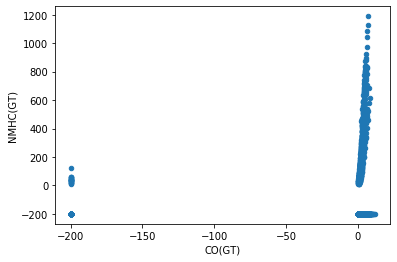

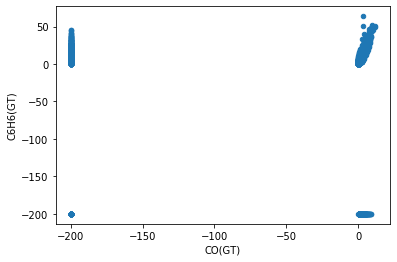

In [32]:
from itertools import combinations

data = pd.read_csv("AirQualityUCI.csv") 
#data.head() 

# Display the concerntrations of CO (CO(GT)) and Non Metanic Hydrocarbons (NMHC(GT)) in a scatterplot 
# and compute how correlated the two 
data.plot.scatter(x='CO(GT)', y='NMHC(GT)')
print("CO(GT)/NMHC(GT) correlation", data['CO(GT)'].corr(data['NO2(GT)']))

#Display the concerntrations of CO (CO(GT)) and Benzene (C6H6(GT)) in a scatterplot. 
data.plot.scatter(x='CO(GT)', y='C6H6(GT)')

#Find which among the five metal oxide chemcial readings (CO, Non Metanic Hydrocarbons, Benzene, 
# Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)) are the most correlated? 
# You can also just find the correlation between C0 and the other four. 

mo_readings = ['CO(GT)', 'NMHC(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']
print(data[mo_readings].corr())
print("NOx(GT) and NO2(GT) have the highest correlation (0.817139)")

# Compute the autocorrelation of each of the five metal oxide chemcial readings
print('Autocorrelations')
for metal in mo_readings:
    print(metal, data[metal].autocorr()) 


# Advanced Level
# 3. Graphing your biorythms over time
Biorhythms are based on the notion that three sinusoidal cycles influence our lives. The physical cycle has a period of 23 days, the emotional cycle has a period of 28 days, and the intellectual cycles has a period of 33 days. For an individual, the cycles are initialized at birth. The figure below shows a biorhythm, which begins on December 19, 1975, plotted for
an eight-week period centered around the date this is written, January 30, 2020.

![title](Biorhythms.png)



1. Create two datetime objects (t0: for your birthdate and t1:for today)
2. Create an array of dates (called dates) starting from 28 days before today until 28 days after at an interval of 1 day.  Hint: you can use the functions 'datetime.timedelta' and 'drange'
3. Convert the datetime object 't0' to seconds with the timestamp() function and named the converted variable as t0t.  (Sorry, you should use date2num) 

[737430.38971346 737431.38971346 737432.38971346 737433.38971346
 737434.38971346 737435.38971346 737436.38971346 737437.38971346
 737438.38971346 737439.38971346 737440.38971346 737441.38971346
 737442.38971346 737443.38971346 737444.38971346 737445.38971346
 737446.38971346 737447.38971346 737448.38971346 737449.38971346
 737450.38971346 737451.38971346 737452.38971346 737453.38971346
 737454.38971346 737455.38971346 737456.38971346 737457.38971346
 737458.38971346 737459.38971346 737460.38971346 737461.38971346
 737462.38971346 737463.38971346 737464.38971346 737465.38971346
 737466.38971346 737467.38971346 737468.38971346 737469.38971346
 737470.38971346 737471.38971346 737472.38971346 737473.38971346
 737474.38971346 737475.38971346 737476.38971346 737477.38971346
 737478.38971346 737479.38971346 737480.38971346 737481.38971346
 737482.38971346 737483.38971346 737484.38971346 737485.38971346]
721341.0


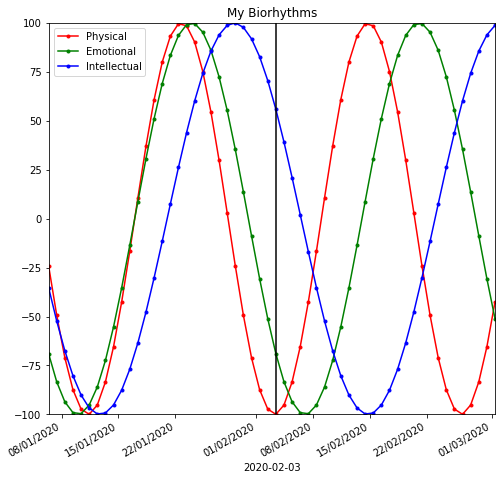

In [26]:
import datetime as datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np 
from matplotlib.dates import MonthLocator, DayLocator, HourLocator, DateFormatter, drange, date2num

#
#  Your code goes here 
# 
# Create two datetime objects (t0: for your birthdate and t1:for today)
t0 = datetime.datetime(1975,12,19);
t1 = datetime.datetime.today()

# Create an array of dates (called dates) starting from 28 days before today until 28 days after at an interval of 1 day.
# Hint: you can use the functions 'datetime.timedelta' and 'drange'
delta = datetime.timedelta(days=1)
dates = drange(t1 - datetime.timedelta(days=28), t1 + datetime.timedelta(days=28), delta)

print(dates)

# Convert the datetime object 't0' to seconds with the timestamp() function and named the converted variable as t0t. 
# Note I made mistake, you should use date2num
t0t = date2num(t0)
print(t0t)
y1 = 100*np.sin(2*np.pi*(dates-t0t)/23);
y2 = 100*np.sin(2*np.pi*(dates-t0t)/28);
y3 = 100*np.sin(2*np.pi*(dates-t0t)/33);


fig, ax = plt.subplots(figsize=(8,8))
ax.plot_date(dates, y1, 'r.-', label='Physical')
ax.plot_date(dates, y2, 'g.-', label='Emotional')
ax.plot_date(dates, y3, 'b.-', label='Intellectual')
ax.plot_date([t1, t1],[-100, 100],'k') 
# this is superfluous, since the autoscaler should get it right, but
# use date2num and num2date to convert between dates and floats if
# you want; both date2num and num2date convert an instance or sequence
ax.set_xlim(dates[0], dates[-1])
ax.set_ylim(-100, 100)
ax.set_xlabel(t1.date())
ax.set_title('My Biorhythms')

# The month locator takes the month or sequence of month you want to
# tick, not the base multiple
ax.legend()
ax.xaxis.set_minor_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%d/%m/%Y'))

ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')
fig.autofmt_xdate()

plt.show()

The code below are your three sinusoidal cycles. 
4. Plot the dates against of the sinusoidal cycle in the same graph
5. You will write code to generate the figure above replacing the date of my birthday with yours. 


In [ ]:
#
# Your code goes here 
# 

In [ ]:
y1 = 100*np.sin(2*np.pi*(dates-t0t)/23);
y2 = 100*np.sin(2*np.pi*(dates-t0t)/28);
y3 = 100*np.sin(2*np.pi*(dates-t0t)/33);

In [ ]:
#
# Your code goes here 
# 